In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import joblib

In [25]:
# Load the data from the uploaded CSV file
df = pd.read_csv('https://raw.githubusercontent.com/foxdocs/cph-bi-2024/refs/heads/main/Data/house-data.csv')

In [26]:
# Display the first few rows of the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [27]:
# Check for missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [28]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [29]:
# Drop duplicates if any
df = df.drop_duplicates()

In [30]:
# Statistical summary of the data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [31]:
# Handle missing values if any
df = df.dropna()

In [33]:
df.dtypes


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [37]:
# Keep only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

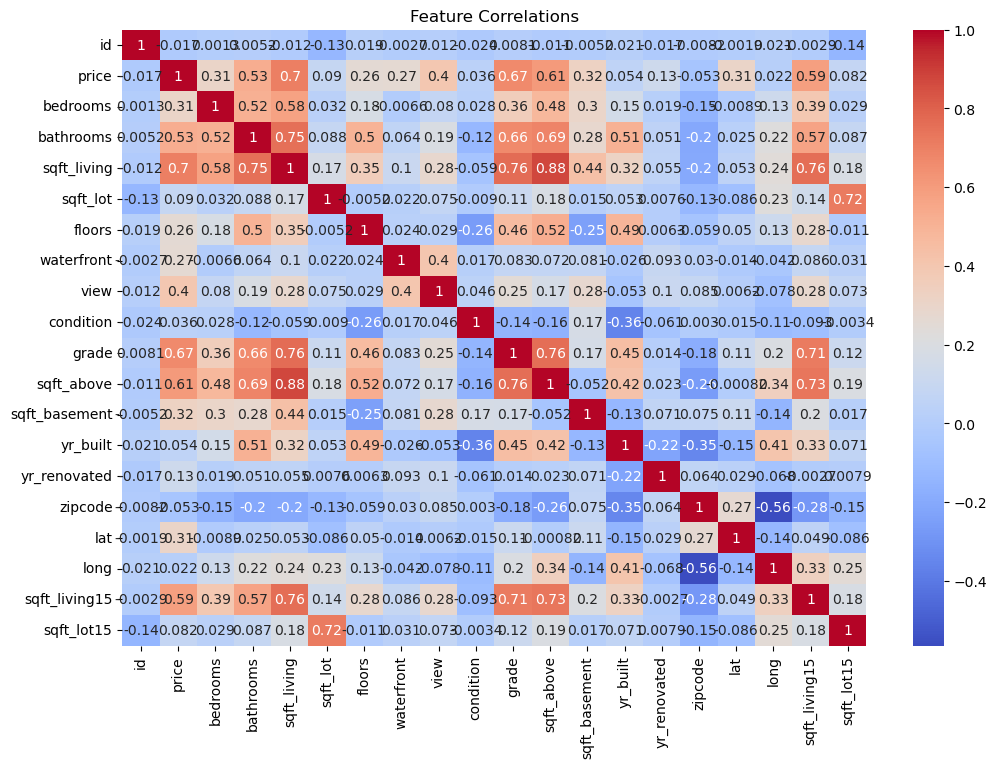

In [39]:
# Plotting correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()


In [40]:
# Selecting features with significant correlations to the target variable (price)
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors']  # Example features; adjust based on correlation analysis
target = 'price'

In [41]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [42]:
# Split data into training and testing sets
X = df[features]
y = df[target]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)


In [45]:
# Calculate accuracy metrics
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)
print(f"Linear Regression - MSE: {linear_mse}, R2: {linear_r2}")

Linear Regression - MSE: 74240588612.02232, R2: 0.5089151794366056


In [46]:
correlation_matrix = df_numeric.corr()  # Beregn korrelationen mellem alle kolonner
print(correlation_matrix['price'].sort_values(ascending=False))  # Sorter og vis korrelationen med 'price'


price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


In [47]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2)  # Adjust degree based on model performance
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [48]:
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

In [49]:
# Calculate accuracy metrics
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)
print(f"Polynomial Regression - MSE: {poly_mse}, R2: {poly_r2}")

Polynomial Regression - MSE: 79722076948.27055, R2: 0.4726563651363255


In [50]:
# Compare models
models = ['Linear', 'Polynomial']
mse_values = [linear_mse, poly_mse]
r2_values = [linear_r2, poly_r2]

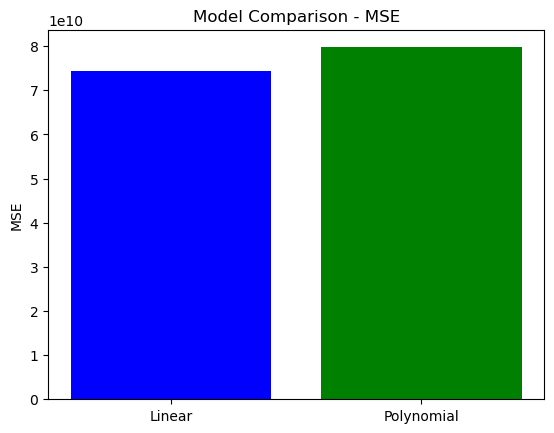

In [51]:
plt.bar(models, mse_values, color=['blue', 'green'])
plt.ylabel('MSE')
plt.title('Model Comparison - MSE')
plt.show()

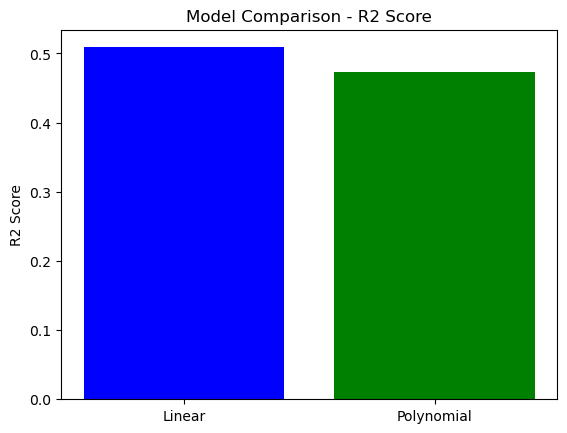

In [52]:
plt.bar(models, r2_values, color=['blue', 'green'])
plt.ylabel('R2 Score')
plt.title('Model Comparison - R2 Score')
plt.show()

In [53]:
# Assuming Polynomial Regression performed best based on R2 score
joblib.dump(poly_model, 'best_model.pkl')

['best_model.pkl']

In [54]:
# Example data: Replace these with your actual results
models = ['Linear', 'Polynomial']
r2_scores = [0.65, 0.78]  # Example R² scores
mse_values = [52000, 43000]  # Example MSE values

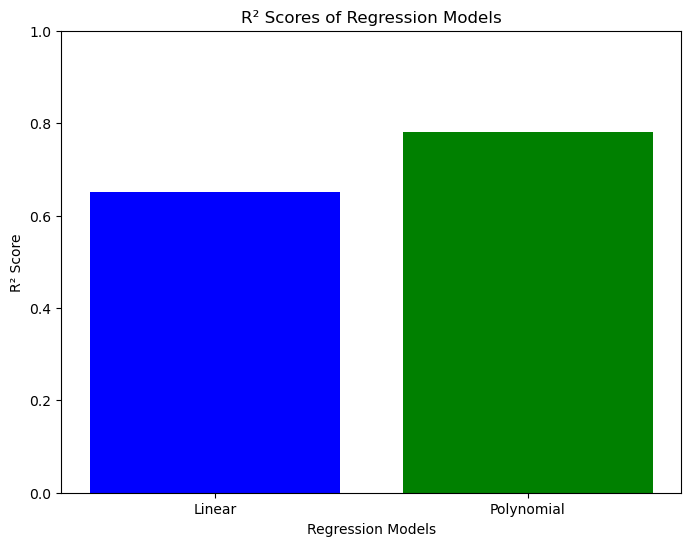

In [55]:
# Plotting R² scores for model comparison
plt.figure(figsize=(8, 6))
plt.bar(models, r2_scores, color=['blue', 'green'])
plt.title("R² Scores of Regression Models")
plt.ylabel("R² Score")
plt.xlabel("Regression Models")
plt.ylim(0, 1)
plt.show()

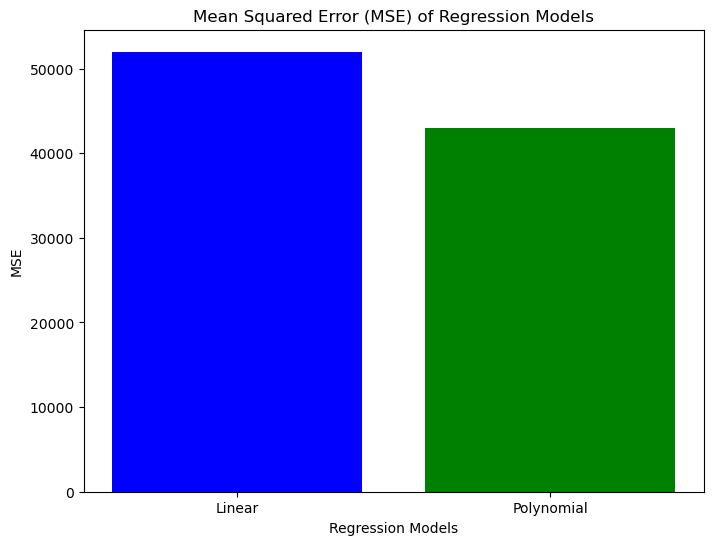

In [56]:
# Plotting Mean Squared Error for model comparison
plt.figure(figsize=(8, 6))
plt.bar(models, mse_values, color=['blue', 'green'])
plt.title("Mean Squared Error (MSE) of Regression Models")
plt.ylabel("MSE")
plt.xlabel("Regression Models")
plt.show()

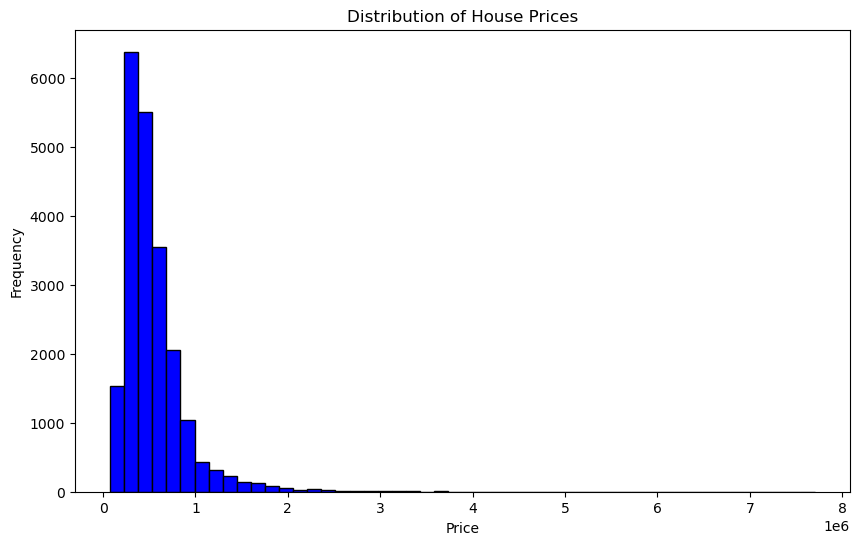

In [57]:
# Plot a histogram for a specific feature (e.g., 'price')
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

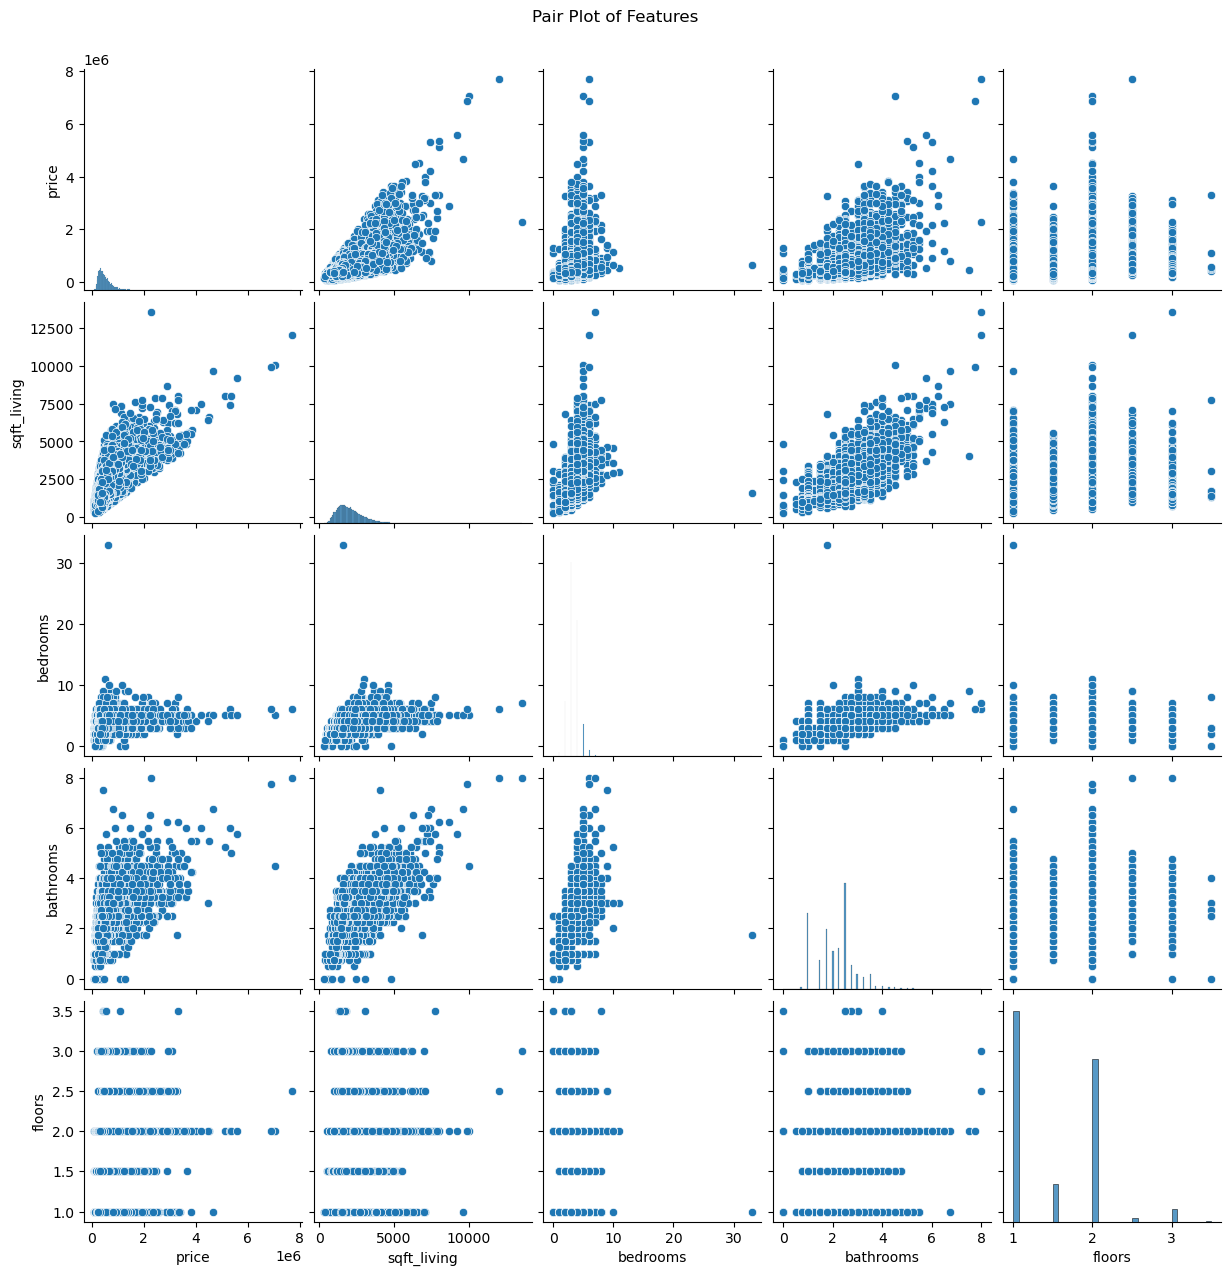

In [59]:
# Using seaborn to create a pairplot for selected features
sns.pairplot(df_numeric[['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors']])
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

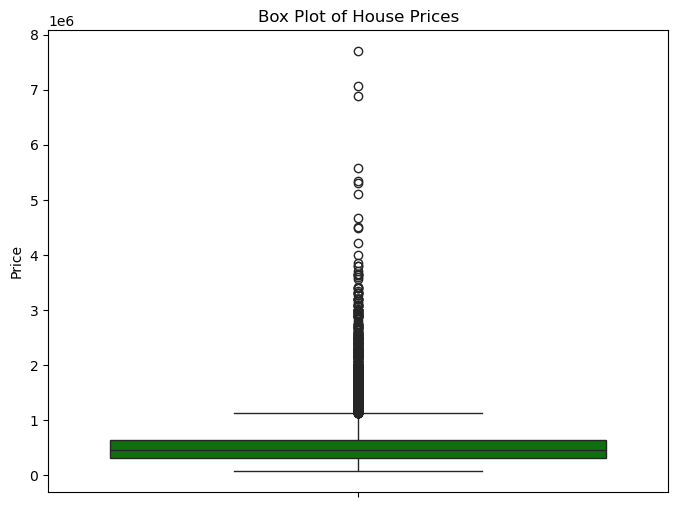

In [60]:
# Boxplot for house prices
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['price'], color='green')
plt.title('Box Plot of House Prices')
plt.ylabel('Price')
plt.show()


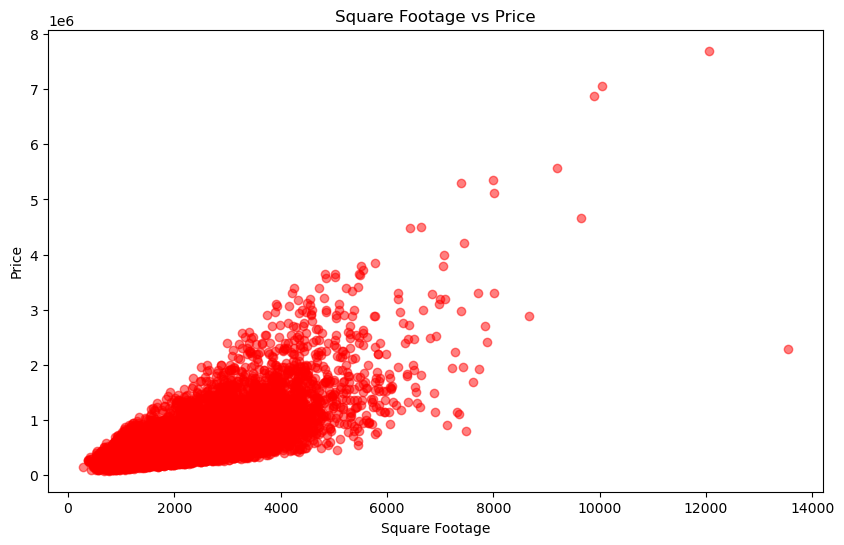

In [61]:
# Scatter plot for 'sqft_living' vs 'price'
plt.figure(figsize=(10, 6))
plt.scatter(df['sqft_living'], df['price'], color='red', alpha=0.5)
plt.title('Square Footage vs Price')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

In [63]:
# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Display correlation with 'price' sorted by the highest correlation
corr_with_price = corr_matrix['price'].sort_values(ascending=False)
print(corr_with_price)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


In [64]:
# Select features based on correlation analysis
features = ['sqft_living', 'sqft_lot', 'view', 'condition', 'grade', 'sqft_above', 'sqft_living15']  # Example features
target = 'price'

In [65]:
# Split data into features (X) and target (y)
X = df[features]
y = df[target]

In [69]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Evaluate Linear Regression
linear_r2 = r2_score(y_test, y_pred_linear)

In [76]:
# Train and evaluate Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [77]:
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

In [78]:
# Evaluate Polynomial Regression
poly_r2 = r2_score(y_test, y_pred_poly)

In [79]:
#  Save the best model
best_model = poly_model if poly_r2 > linear_r2 else linear_model
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [80]:
#  Plot comparison of R² Scores
models = ['Linear', 'Polynomial']
r2_scores = [linear_r2, poly_r2]

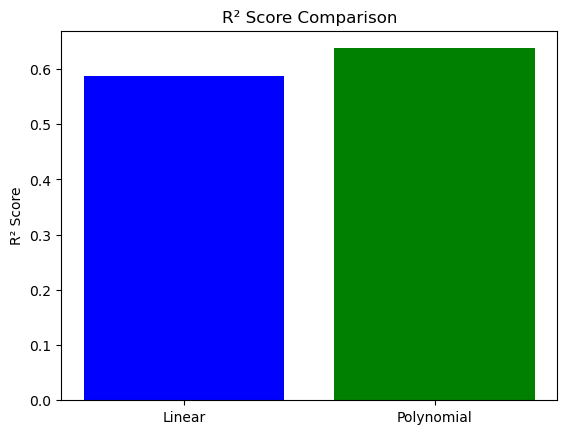

In [81]:
plt.bar(models, r2_scores, color=['blue', 'green'])
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.show()